In [1]:
import numpy as np
from numpy import loadtxt
from astropy.io import fits
import scipy.constants as cnt
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10 , 5)

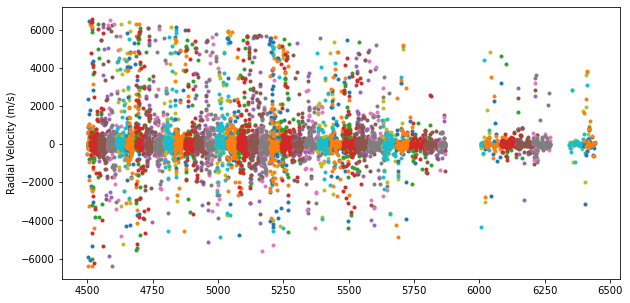

In [2]:
filtro = fits.getdata("data/ESPRESSO_G9.fits")
ori_lambda = filtro["lambda"]
ori_contrast = filtro["contrast"]

numbers = np.arange(51,119) # array with the numbers used to access the files
n2 = np.arange(121,131)
numbers = np.append(numbers,n2)
n3 = np.arange(133,137)
numbers = np.append(numbers,n3)

N = len(numbers) 

data = np.zeros([N,171]) # empty matrix to store the fitted values of the wavelenghts
# the previous matrix has 27 columns because it is the maximum value of wavelenghts found
RV_matrix = np.zeros([N,171]) # empty matrix to store the RV values for each wavelenght
RV = np.zeros(0) # empty array to store the RV values
uncert_matrix = np.zeros([N,171])
uncert = np.zeros(0)
wave = np.zeros(0)
contrast = np.zeros(0)

for i,n in enumerate(numbers):
    
    info=loadtxt('data/data_3/{}.ares'.format(n),float) # loads the file with the data
    
    if np.ndim(info)!=1:
        fit=info[:,8]
        ref=info[:,0]
        err=info[:,9]
        M=len(fit)
        
    else:
        fit=info[8]
        ref=info[0]
        err=[9]
        M=1
        
    data[i,:M]=fit #stores the data for each document in the data matrix 
    wave = np.append(wave,data[i,:M])
    
    # this lines identify the lines that should be used from the original line data
    distances = np.abs(ori_lambda[:, np.newaxis] - ref)
    closest_indices = np.argmin(distances, axis=0)
    ref = ori_lambda[closest_indices]
    contrast = np.append(contrast,ori_contrast[closest_indices])
    
    RV_matrix[i,:M] = (fit - ref) / ref * cnt.c # calculates the values of RV and stores them in the RV_matrix
    RV = np.append(RV,RV_matrix[i,:M]) # stores the values in the RV array
    uncert_matrix[i,:M] = err / ref *cnt.c
    uncert = np.append(uncert,uncert_matrix[i,:M])
    
    plt.plot(ref,RV_matrix[i,:M],'.') # plots the graphic
    
N_dim_3741 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outliers
N_dim_3741[0] = len(RV)

uncert_3741 = uncert
wave_3741 = wave

ARES_RV = -16600
CCF = -16646.1
    
plt.ylabel('Radial Velocity (m/s)')
plt.show()

# 229

In [3]:
RV_229 = np.zeros(0)
uncert_229 = np.zeros(0)

for i, c in enumerate(contrast):
    if c >= 0.55:
        RV_229 = np.append(RV_229,RV[i])
        uncert_229 = np.append(uncert_229,uncert[i])
    else:
        pass
    
N_dim_229 = np.zeros(3,dtype=int)
N_dim_229[0] = len(RV_229)

mean = 200.00893 m/s ; standard deviation / √N = 52.67260 m/s
weighted mean = -25.11539 m/s ; weighted standard deviation / √N = 0.52097 m/s
median = -31.09077 m/s


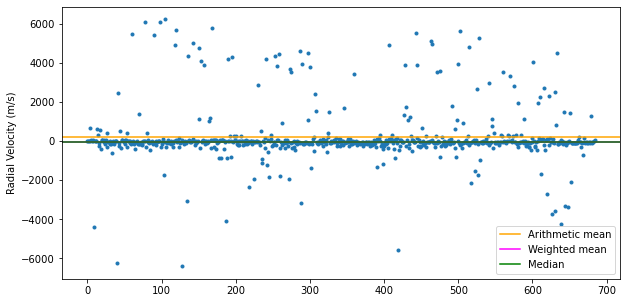

mean = -16399.99107 m/s ; standard deviation / √N = 52.67260 m/s
weighted mean = -16625.11539 m/s ; weighted standard deviation / √N = 0.52097 m/s
median = -16631.09077 m/s


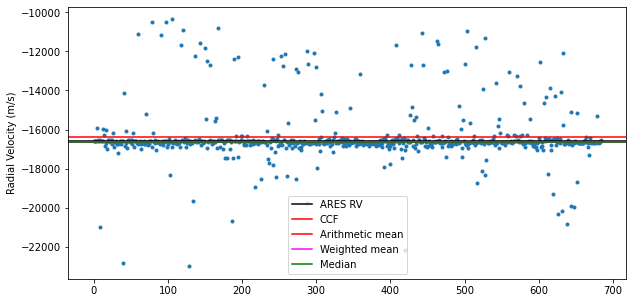

In [4]:
std = np.std(RV_229) # standard deviation of the values of the RVs
mean = np.mean(RV_229) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV_229 - wmean) / uncert_229
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV_229 * pi * uncert_229 ** (-2)).sum() / (pi * uncert_229 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_229 ** (-2)).sum())
    sigma = (RV_229 - wmean) / uncert_229
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV_229) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV_229))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV_229))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV_229,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV_229))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV_229))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV_229 + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = -6.30818 m/s ; standard deviation / √N = 21.10549 m/s
weighted mean = -33.23198 m/s ; weighted standard deviation / √N = 0.54308 m/s
median = -36.15739 m/s


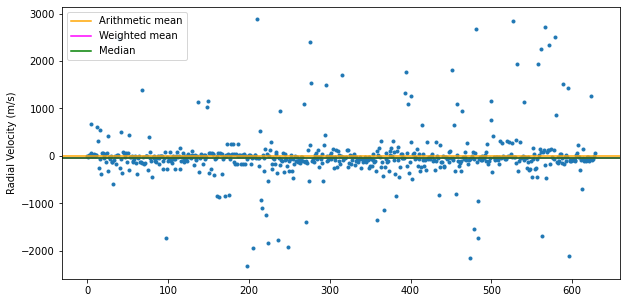

mean = -16606.30818 m/s ; standard deviation / √N = 21.10549 m/s
weighted mean = -16633.23198 m/s ; weighted standard deviation / √N = 0.54308 m/s
median = -16636.15739 m/s


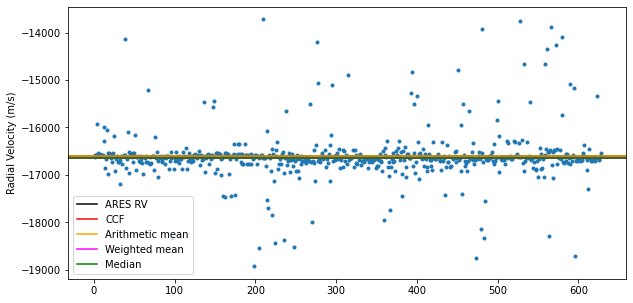

In [5]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV_229): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_229[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_229[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -48.52336 m/s ; standard deviation / √N = 8.77485 m/s
weighted mean = -37.77124 m/s ; weighted standard deviation / √N = 0.56613 m/s
median = -38.69035 m/s


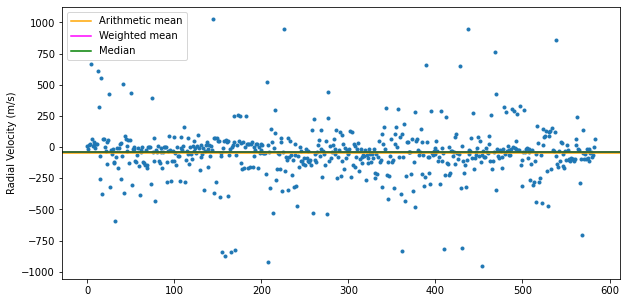

mean = -16648.52336 m/s ; standard deviation / √N = 8.77485 m/s
weighted mean = -16637.77124 m/s ; weighted standard deviation / √N = 0.56613 m/s
median = -16638.69035 m/s


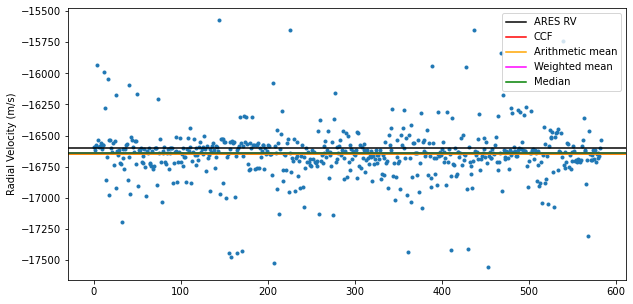

In [6]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_229 = len(corr2RV)
mean_229 = corr2_mean
std_229 = corr2_std
wmean_229 = corr2_wmean
wstd_229 = corr2_wstd
median_229 = corr2_median

N_dim_229[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix = np.zeros([4,5])
Matrix[0,0] = corr2_mean + ARES_RV
Matrix[0,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[0,2] = corr2_wmean + ARES_RV
Matrix[0,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[0,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 595

In [7]:
RV_595 = np.zeros(0)
uncert_595 = np.zeros(0)

for i, c in enumerate(contrast):
    if c >= 0.35:
        RV_595 = np.append(RV_595,RV[i])
        uncert_595 = np.append(uncert_595,uncert[i])
    else:
        pass
    
N_dim_595 = np.zeros(3,dtype=int)
N_dim_595[0] = len(RV_595)

mean = 169.19590 m/s ; standard deviation / √N = 29.24980 m/s
weighted mean = -7.55651 m/s ; weighted standard deviation / √N = 0.17342 m/s
median = -23.52218 m/s


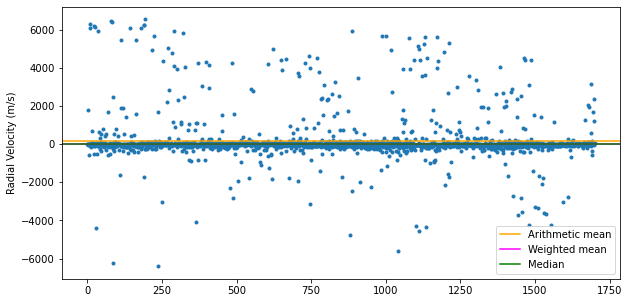

mean = -16430.80410 m/s ; standard deviation / √N = 29.24980 m/s
weighted mean = -16607.55651 m/s ; weighted standard deviation / √N = 0.17342 m/s
median = -16623.52218 m/s


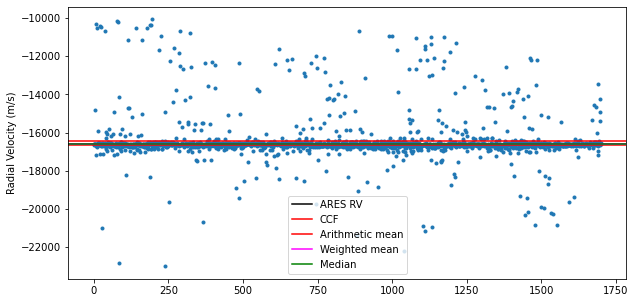

In [8]:
std = np.std(RV_595) # standard deviation of the values of the RVs
mean = np.mean(RV_595) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV_595 - wmean) / uncert_595
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV_595 * pi * uncert_595 ** (-2)).sum() / (pi * uncert_595 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_595 ** (-2)).sum())
    sigma = (RV_595 - wmean) / uncert_595
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV_595) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV_595))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV_595))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV_595,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV_595))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV_595))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV_595 + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 4.83471 m/s ; standard deviation / √N = 10.91457 m/s
weighted mean = 41.30759 m/s ; weighted standard deviation / √N = 0.17421 m/s
median = -27.42057 m/s


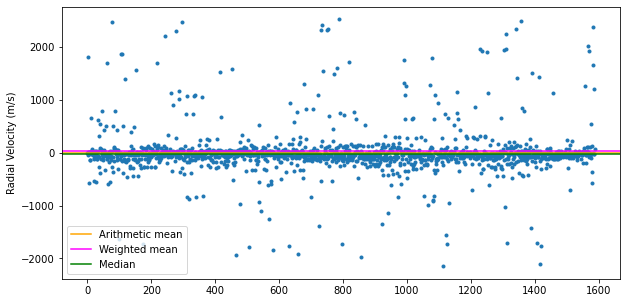

mean = -16595.16529 m/s ; standard deviation / √N = 10.91457 m/s
weighted mean = -16558.69241 m/s ; weighted standard deviation / √N = 0.17421 m/s
median = -16627.42057 m/s


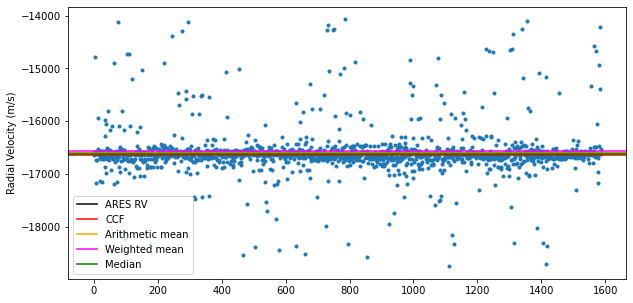

In [9]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV_595): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_595[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_595[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -32.35209 m/s ; standard deviation / √N = 4.70802 m/s
weighted mean = -34.42186 m/s ; weighted standard deviation / √N = 0.18723 m/s
median = -28.81693 m/s


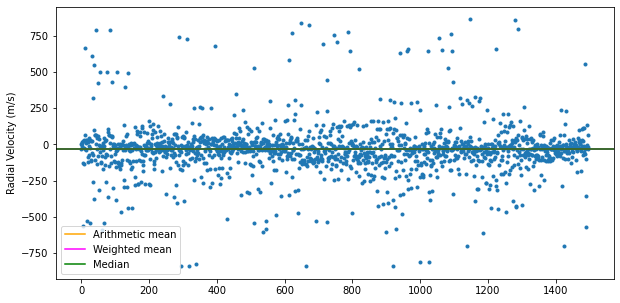

mean = -16632.35209 m/s ; standard deviation / √N = 4.70802 m/s
weighted mean = -16634.42186 m/s ; weighted standard deviation / √N = 0.18723 m/s
median = -16628.81693 m/s


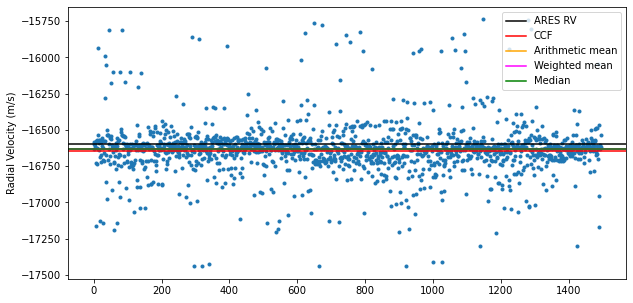

In [10]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_595 = len(corr2RV)
mean_595 = corr2_mean
std_595 = corr2_std
wmean_595 = corr2_wmean
wstd_595 = corr2_wstd
median_595 = corr2_median

N_dim_595[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix[1,0] = corr2_mean + ARES_RV
Matrix[1,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[1,2] = corr2_wmean + ARES_RV
Matrix[1,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[1,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 1030

In [11]:
RV_1030 = np.zeros(0)
uncert_1030 = np.zeros(0)

for i, c in enumerate(contrast):
    if c >= 0.2:
        RV_1030 = np.append(RV_1030,RV[i])
        uncert_1030 = np.append(uncert_1030,uncert[i])
    else:
        pass
    
N_dim_1030 = np.zeros(3,dtype=int)
N_dim_1030[0] = len(RV_1030)

mean = 190.79924 m/s ; standard deviation / √N = 20.93412 m/s
weighted mean = -10.62324 m/s ; weighted standard deviation / √N = 0.08786 m/s
median = -15.90197 m/s


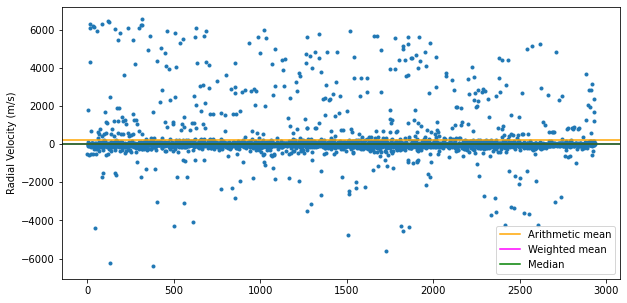

mean = -16409.20076 m/s ; standard deviation / √N = 20.93412 m/s
weighted mean = -16610.62324 m/s ; weighted standard deviation / √N = 0.08786 m/s
median = -16615.90197 m/s


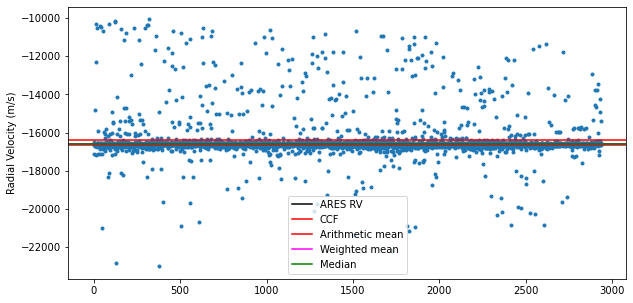

In [12]:
std = np.std(RV_1030) # standard deviation of the values of the RVs
mean = np.mean(RV_1030) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV_1030 - wmean) / uncert_1030
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV_1030 * pi * uncert_1030 ** (-2)).sum() / (pi * uncert_1030 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_1030 ** (-2)).sum())
    sigma = (RV_1030 - wmean) / uncert_1030
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV_1030) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV_1030))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV_1030))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV_1030,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV_1030))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV_1030))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV_1030 + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 11.64894 m/s ; standard deviation / √N = 7.30529 m/s
weighted mean = 12.55652 m/s ; weighted standard deviation / √N = 0.08960 m/s
median = -19.25509 m/s


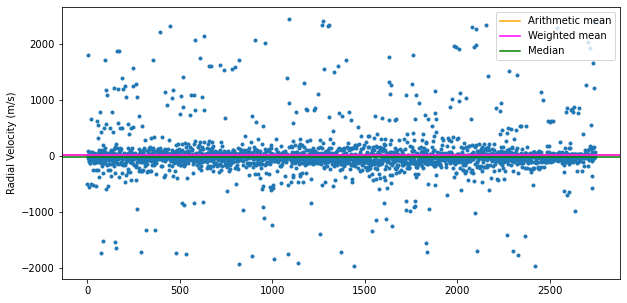

mean = -16588.35106 m/s ; standard deviation / √N = 7.30529 m/s
weighted mean = -16587.44348 m/s ; weighted standard deviation / √N = 0.08960 m/s
median = -16619.25509 m/s


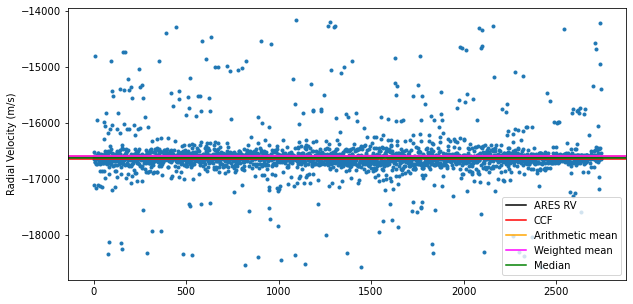

In [13]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV_1030): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_1030[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_1030[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -21.00022 m/s ; standard deviation / √N = 3.13799 m/s
weighted mean = -21.48216 m/s ; weighted standard deviation / √N = 0.09396 m/s
median = -20.69848 m/s


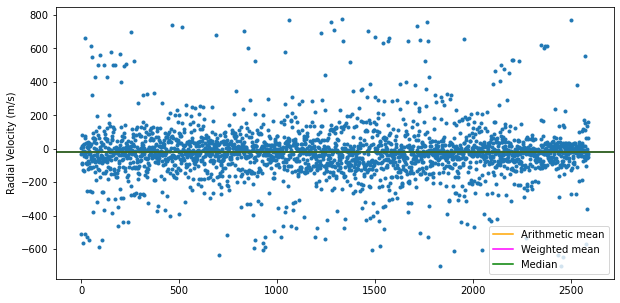

mean = -16621.00022 m/s ; standard deviation / √N = 3.13799 m/s
weighted mean = -16621.48216 m/s ; weighted standard deviation / √N = 0.09396 m/s
median = -16620.69848 m/s


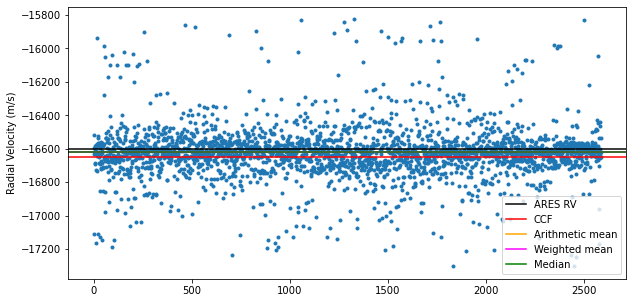

In [14]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_1030 = len(corr2RV)
mean_1030 = corr2_mean
std_1030 = corr2_std
wmean_1030 = corr2_wmean
wstd_1030 = corr2_wstd
median_1030 = corr2_median

N_dim_1030[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix[2,0] = corr2_mean + ARES_RV
Matrix[2,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[2,2] = corr2_wmean + ARES_RV
Matrix[2,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[2,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 3741

In [15]:
RV_3741 = np.zeros(0)
uncert_3741 = np.zeros(0)

for i, c in enumerate(contrast):
    if c >= 0:
        RV_3741 = np.append(RV_3741,RV[i])
        uncert_3741 = np.append(uncert_3741,uncert[i])
    else:
        pass
    
N_dim_3741 = np.zeros(3,dtype=int)
N_dim_3741[0] = len(RV_3741)

mean = 170.88709 m/s ; standard deviation / √N = 12.95980 m/s
weighted mean = 54.92674 m/s ; weighted standard deviation / √N = 0.01818 m/s
median = -3.19911 m/s


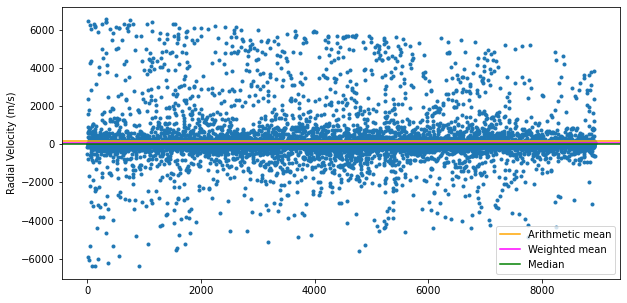

mean = -16429.11291 m/s ; standard deviation / √N = 12.95980 m/s
weighted mean = -16545.07326 m/s ; weighted standard deviation / √N = 0.01818 m/s
median = -16603.19911 m/s


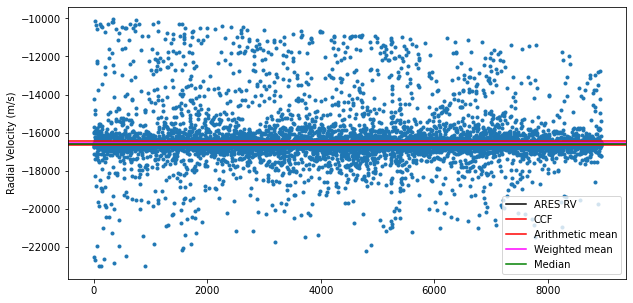

In [16]:
std = np.std(RV_3741) # standard deviation of the values of the RVs
mean = np.mean(RV_3741) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV_3741 - wmean) / uncert_3741
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV_3741 * pi * uncert_3741 ** (-2)).sum() / (pi * uncert_3741 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_3741 ** (-2)).sum())
    sigma = (RV_3741 - wmean) / uncert_3741
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV_3741) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV_3741))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV_3741))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV_3741,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV_3741))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV_3741))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV_3741 + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 25.94421 m/s ; standard deviation / √N = 5.97135 m/s
weighted mean = -961.35761 m/s ; weighted standard deviation / √N = 0.08200 m/s
median = -8.82669 m/s


<ipython-input-17-0218896098f5>:20: RuntimeWarning: invalid value encountered in sqrt
  corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())


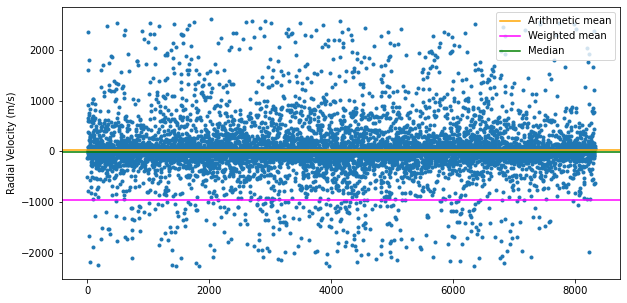

mean = -16574.05579 m/s ; standard deviation / √N = 5.97135 m/s
weighted mean = -17561.35761 m/s ; weighted standard deviation / √N = 0.08200 m/s
median = -16608.82669 m/s


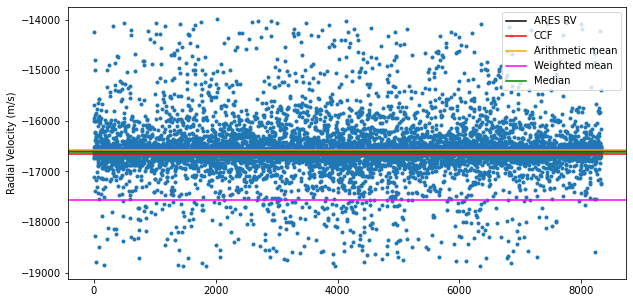

In [17]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV_3741): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_3741[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_3741[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = 6.54484 m/s ; standard deviation / √N = 3.59268 m/s
weighted mean = 8.30481 m/s ; weighted standard deviation / √N = 0.02058 m/s
median = -10.02371 m/s


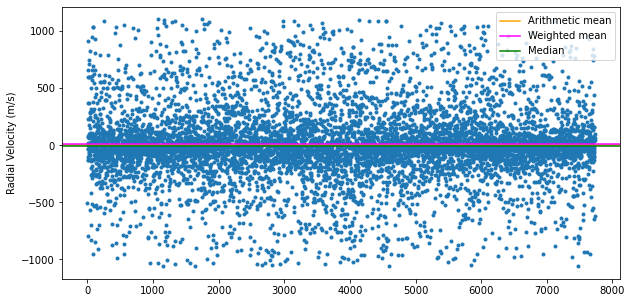

mean = -16593.45516 m/s ; standard deviation / √N = 3.59268 m/s
weighted mean = -16591.69519 m/s ; weighted standard deviation / √N = 0.02058 m/s
median = -16610.02371 m/s


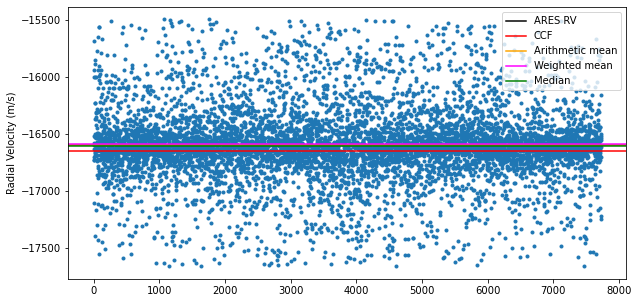

In [18]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_3741 = len(corr2RV)
mean_3741 = corr2_mean
std_3741 = corr2_std
wmean_3741 = corr2_wmean
wstd_3741 = corr2_wstd
median_3741 = corr2_median

N_dim_3741[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix[3,0] = corr2_mean + ARES_RV
Matrix[3,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[3,2] = corr2_wmean + ARES_RV
Matrix[3,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[3,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# Mean RV for a different number of initial wavelenghts

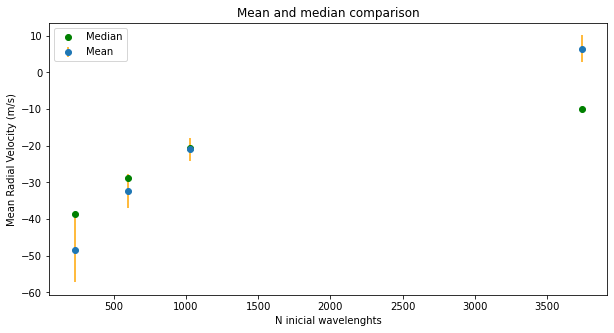

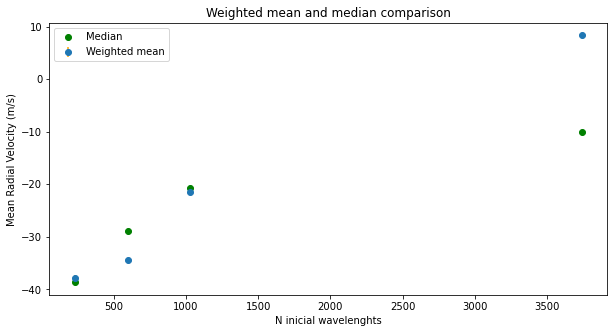

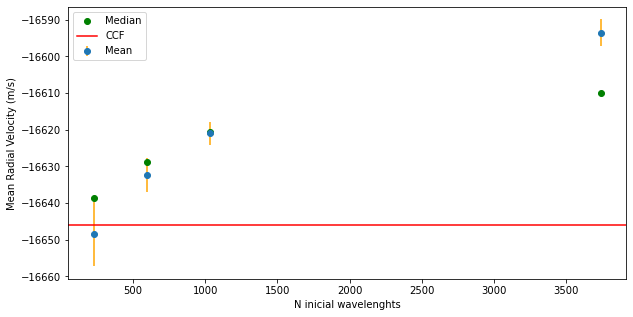

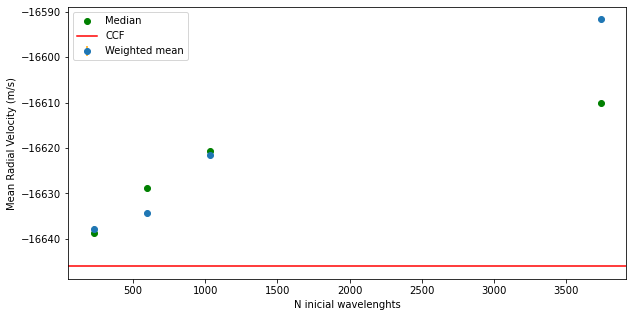

In [19]:
Means = np.array([mean_229,mean_595,mean_1030,mean_3741])
Std = np.array([std_229,std_595,std_1030,std_3741])
Wmeans = np.array([wmean_229,wmean_595,wmean_1030,wmean_3741])
Wstd = np.array([wstd_229,wstd_595,wstd_1030,wstd_3741])
Medians = np.array([median_229,median_595,median_1030,median_3741])

Std_root = np.array([std_229 / np.sqrt(N_dim_229[2]),std_595 / np.sqrt(N_dim_595[2]),std_1030 / np.sqrt(N_dim_1030[2]),std_3741 / np.sqrt(N_dim_3741[2])])
Wstd_root = np.array([wstd_229 / np.sqrt(N_dim_229[2]),wstd_595 / np.sqrt(N_dim_595[2]),wstd_1030 / np.sqrt(N_dim_1030[2]),wstd_3741 / np.sqrt(N_dim_3741[2])])

N_wave = np.array([229,595,1030,3741])

#plt.errorbar(N_wave,Means,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Mean and median comparison')
plt.show()

#plt.errorbar(N_wave,Wmeans,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Weighted mean and median comparison')
plt.show()

#plt.errorbar(N_wave,Means+ARES_RV,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means+ARES_RV,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
#plt.axhline(ARES_RV,label='ARES RV',color='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.legend()
plt.show()

#plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
#plt.axhline(ARES_RV,label='ARES RV',color='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.legend()
plt.show()

# Percentage of wavelenght decrease

   N ref lines  N fitted lines  1st removal      1st %  2nd removal      2nd %
0          229             685          629  91.824818          584  85.255474
1          595            1701         1588  93.356849         1497  88.007055
2         1030            2936         2745  93.494550         2589  88.181199
3         3741            8935         8326  93.184107         7731  86.524902


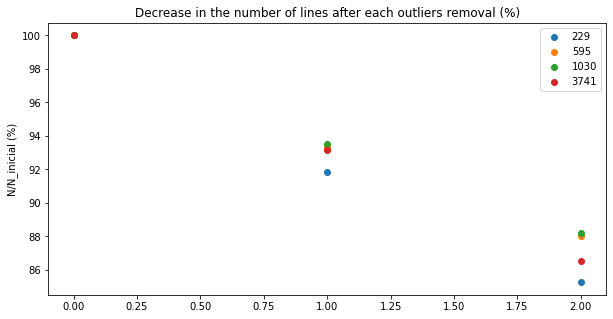

In [20]:
data = {
    'N ref lines':[229,595,1030,3741],
    'N fitted lines':[N_dim_229[0],N_dim_595[0],N_dim_1030[0],N_dim_3741[0]],
    '1st removal':[N_dim_229[1],N_dim_595[1],N_dim_1030[1],N_dim_3741[1]],
    '1st %':[N_dim_229[1]/N_dim_229[0]*100,N_dim_595[1]/N_dim_595[0]*100,N_dim_1030[1]/N_dim_1030[0]*100,N_dim_3741[1]/N_dim_3741[0]*100],
    '2nd removal':[N_dim_229[2],N_dim_595[2],N_dim_1030[2],N_dim_3741[2]],
    '2nd %':[N_dim_229[2]/N_dim_229[0]*100,N_dim_595[2]/N_dim_595[0]*100,N_dim_1030[2]/N_dim_1030[0]*100,N_dim_3741[2]/N_dim_3741[0]*100]
}

# Create a DataFrame (table) from the data
df = pd.DataFrame(data)

# Display the table
print(df)

N_dim_229_per = np.array([1,N_dim_229[1] / N_dim_229[0],N_dim_229[2] / N_dim_229[0]])*100
N_dim_595_per = np.array([1,N_dim_595[1] / N_dim_595[0],N_dim_595[2] / N_dim_595[0]])*100
N_dim_1030_per = np.array([1,N_dim_1030[1] / N_dim_1030[0],N_dim_1030[2] / N_dim_1030[0]])*100
N_dim_3741_per = np.array([1,N_dim_3741[1] / N_dim_3741[0],N_dim_3741[2] / N_dim_3741[0]])*100


plt.plot(N_dim_229_per,'o',label='229')
plt.plot(N_dim_595_per,'o',label='595')
plt.plot(N_dim_1030_per,'o',label='1030')
plt.plot(N_dim_3741_per,'o',label='3741')
plt.legend()
plt.title('Decrease in the number of lines after each outliers removal (%)')
plt.ylabel('N/N_inicial (%)')
plt.show()

# Histograms of the error

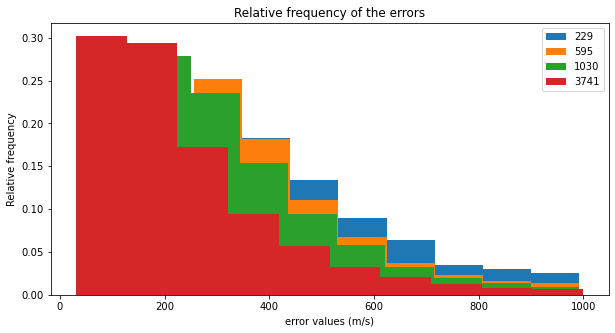

In [21]:
new_uncert_229 = [x for x in uncert_229 if x < 1e3]
plt.hist(new_uncert_229,weights=np.zeros_like(new_uncert_229) + 1. / len(new_uncert_229),label='229')

new_uncert_595 = [x for x in uncert_595 if x < 1e3]
plt.hist(new_uncert_595,weights=np.zeros_like(new_uncert_595) + 1. / len(new_uncert_595),label='595')

new_uncert_1030 = [x for x in uncert_1030 if x < 1e3]
plt.hist(new_uncert_1030,weights=np.zeros_like(new_uncert_1030) + 1. / len(new_uncert_1030),label='1030')

new_uncert_3741 = [x for x in uncert_3741 if x < 1e3]
plt.hist(new_uncert_3741,weights=np.zeros_like(new_uncert_3741) + 1. / len(new_uncert_3741),label='3741')

plt.title('Relative frequency of the errors')
plt.xlabel('error values (m/s)')
plt.ylabel('Relative frequency')
plt.legend()
plt.show()

In [22]:
np.savetxt('values_3.txt',Matrix)